<a href="https://colab.research.google.com/github/bjoyita/SHAP_MaterialsDesign/blob/main/RT_kappa_sigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


**Installing Materials Data Minining tools**

In [ ]:
pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.1/515.1 KB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 KB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.3/555.3 KB 42.9 MB/s eta 0:00:0

In [ ]:
pip install matminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.6 MB/s eta 0:00:00


**Loading data**

In [ ]:
ds_RT = pd.read_excel('Data_TE_RT.xlsx')
ds_RT

,Formula,sigma,kappa
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,49.200,2.513
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,113.000,2.268
2,Ca1.0Mn0.98Nb0.02O3.0,50.000,2.500
3,Ca1.0Gd0.96Mn0.04O3.0,67.300,1.787
4,Ca1.0Gd0.94Mn0.06O3.0,68.800,2.850
...,...,...,...
199,Mg1.9Ca0.1Si1.0,472.000,5.200
200,Mg2.0Si1.0,821.000,7.250
201,Fe0.998Co0.002Si2.0,21.100,5.690
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,7.843,4.590


**Data preprocessing for Machine Learning**

**Importing Composition and ElementFraction**

In [ ]:
from pymatgen.core.composition import Composition
from matminer.featurizers.composition import ElementFraction
ef = ElementFraction()
element_fraction_labels = ef.feature_labels()
print(element_fraction_labels)

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']


In [ ]:
ds_RT['Formula']
Comp = []
for value in ds_RT['Formula']:
  Comp.append(Composition(value))
Comp

[Comp: Ca0.98 Mn0.98 Nb0.02 Bi0.02 O3,
 Comp: Ca0.96 Mn0.96 Nb0.04 Bi0.04 O3,
 Comp: Ca1 Mn0.98 Nb0.02 O3,
 Comp: Ca1 Gd0.96 Mn0.04 O3,
 Comp: Ca1 Gd0.94 Mn0.06 O3,
 Comp: Ca0.9 Tb0.1 Mn1 O3,
 Comp: Ca0.7 Tb0.3 Mn1 O3,
 Comp: Ca0.9 Ho0.1 Mn1 O3,
 Comp: Ca0.7 Ho0.3 Mn1 O3,
 Comp: Ca0.9 Y0.1 Mn1 O3,
 Comp: Ca0.7 Y0.3 Mn1 O3,
 Comp: Ca1 Mn1 O3,
 Comp: Ca1 Yb0.05 Mn0.95 O3,
 Comp: Ca1 Yb0.1 Mn0.9 O3,
 Comp: Ca1 Yb0.15 Mn0.85 O3,
 Comp: Ca0.3 Sm1.7 Mn1 O3,
 Comp: Ca0.5 Sm0.5 Mn1 O3,
 Comp: Ca1 Mn1 O3,
 Comp: Ca0.9 Mn1 Bi0.1 O3,
 Comp: Ca1 Mn1 O3,
 Comp: In2 O3,
 Comp: In1.998 Ge0.002 O3,
 Comp: In1.994 Ge0.006 O3,
 Comp: In1.985 Ge0.015 O3,
 Comp: In1.94 Ge0.06 O3,
 Comp: In1.9 Ge0.1 O3,
 Comp: In1.8 Ge0.2 O3,
 Comp: Sr2 Ti0.8 Nb0.2 O4,
 Comp: Sr3 Ti1.6 Nb0.4 O7,
 Comp: Sr1 Ti0.8 Nb0.2 O3,
 Comp: Sr0.9 La0.1 Ti1 O3,
 Comp: Sr1 Ti0.8 Nb0.2 O3,
 Comp: Zn1 O1,
 Comp: Al0.005 Zn0.995 O1,
 Comp: Al0.01 Zn0.99 O1,
 Comp: Al0.02 Zn0.98 O1,
 Comp: Al0.05 Zn0.95 O1,
 Comp: Sr1 Ti0.85 Nb0.15 O3,
 Com

In [ ]:
ds_RT['Composition'] = Comp
ds_RT

,Formula,sigma,kappa,Composition
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,49.200,2.513,"(Ca, Bi, Mn, Nb, O)"
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,113.000,2.268,"(Ca, Bi, Mn, Nb, O)"
2,Ca1.0Mn0.98Nb0.02O3.0,50.000,2.500,"(Ca, Mn, Nb, O)"
3,Ca1.0Gd0.96Mn0.04O3.0,67.300,1.787,"(Ca, Gd, Mn, O)"
4,Ca1.0Gd0.94Mn0.06O3.0,68.800,2.850,"(Ca, Gd, Mn, O)"
...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,472.000,5.200,"(Mg, Ca, Si)"
200,Mg2.0Si1.0,821.000,7.250,"(Mg, Si)"
201,Fe0.998Co0.002Si2.0,21.100,5.690,"(Fe, Co, Si)"
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,7.843,4.590,"(Fe, Co, Si, Y, O)"


**Incorporating Composition and individual element of periodic table in the dataframe**

In [ ]:
ds_RT = ef.featurize_dataframe(ds_RT,'Composition')
ds_RT

ElementFraction:   0%|          | 0/204 [00:00<?, ?it/s]

,Formula,sigma,kappa,Composition,H,He,Li,Be,B,C,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,49.200,2.513,"(Ca, Bi, Mn, Nb, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,113.000,2.268,"(Ca, Bi, Mn, Nb, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ca1.0Mn0.98Nb0.02O3.0,50.000,2.500,"(Ca, Mn, Nb, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ca1.0Gd0.96Mn0.04O3.0,67.300,1.787,"(Ca, Gd, Mn, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ca1.0Gd0.94Mn0.06O3.0,68.800,2.850,"(Ca, Gd, Mn, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,472.000,5.200,"(Mg, Ca, Si)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
200,Mg2.0Si1.0,821.000,7.250,"(Mg, Si)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
201,Fe0.998Co0.002Si2.0,21.100,5.690,"(Fe, Co, Si)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,7.843,4.590,"(Fe, Co, Si, Y, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


**Dimensionality Reduction: Dropping columns with 0 values only**

In [ ]:
ds_RT = ds_RT.loc[:, (ds_RT != 0).any(axis=0)]
ds_RT 

,Formula,sigma,kappa,Composition,B,O,Na,Mg,Al,Si,...,Tb,Dy,Ho,Yb,Hf,W,Au,Tl,Pb,Bi
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,49.200,2.513,"(Ca, Bi, Mn, Nb, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,113.000,2.268,"(Ca, Bi, Mn, Nb, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008
2,Ca1.0Mn0.98Nb0.02O3.0,50.000,2.500,"(Ca, Mn, Nb, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,Ca1.0Gd0.96Mn0.04O3.0,67.300,1.787,"(Ca, Gd, Mn, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,Ca1.0Gd0.94Mn0.06O3.0,68.800,2.850,"(Ca, Gd, Mn, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,472.000,5.200,"(Mg, Ca, Si)",0.0,0.000000,0.0,0.633333,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
200,Mg2.0Si1.0,821.000,7.250,"(Mg, Si)",0.0,0.000000,0.0,0.666667,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
201,Fe0.998Co0.002Si2.0,21.100,5.690,"(Fe, Co, Si)",0.0,0.000000,0.0,0.000000,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,7.843,4.590,"(Fe, Co, Si, Y, O)",0.0,0.019737,0.0,0.000000,0.0,0.644745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
ds_RT = ds_RT.drop(['Composition'], axis = 1)
ds_RT

,Formula,sigma,kappa,B,O,Na,Mg,Al,Si,P,...,Tb,Dy,Ho,Yb,Hf,W,Au,Tl,Pb,Bi
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,49.200,2.513,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,113.000,2.268,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008
2,Ca1.0Mn0.98Nb0.02O3.0,50.000,2.500,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,Ca1.0Gd0.96Mn0.04O3.0,67.300,1.787,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,Ca1.0Gd0.94Mn0.06O3.0,68.800,2.850,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,472.000,5.200,0.0,0.000000,0.0,0.633333,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
200,Mg2.0Si1.0,821.000,7.250,0.0,0.000000,0.0,0.666667,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
201,Fe0.998Co0.002Si2.0,21.100,5.690,0.0,0.000000,0.0,0.000000,0.0,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,7.843,4.590,0.0,0.019737,0.0,0.000000,0.0,0.644745,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
ds_RT.columns

Index(['Formula', 'sigma', 'kappa', 'B', 'O', 'Na', 'Mg', 'Al', 'Si', 'P', 'S',
       'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge',
       'Se', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ag', 'In', 'Sn', 'Sb', 'Te', 'I',
       'Cs', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Tb', 'Dy', 'Ho', 'Yb', 'Hf',
       'W', 'Au', 'Tl', 'Pb', 'Bi'],
      dtype='object')

**Data Ready for Machine Learning**



In [ ]:
ds_RT = ds_RT.reindex(columns = ['Formula','B', 'O', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca',
       'Ti', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'Se', 'Sr',
       'Y', 'Zr', 'Nb', 'Mo', 'Ag', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs', 'Ba',
       'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Tb', 'Dy', 'Ho', 'Yb', 'Hf', 'W', 'Au',
       'Tl', 'Pb', 'Bi', 'sigma','kappa'])

In [ ]:
ds_RT

,Formula,B,O,Na,Mg,Al,Si,P,S,K,...,Ho,Yb,Hf,W,Au,Tl,Pb,Bi,sigma,kappa
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,49.200,2.513
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008,113.000,2.268
2,Ca1.0Mn0.98Nb0.02O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,50.000,2.500
3,Ca1.0Gd0.96Mn0.04O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,67.300,1.787
4,Ca1.0Gd0.94Mn0.06O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,68.800,2.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,0.0,0.000000,0.0,0.633333,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,472.000,5.200
200,Mg2.0Si1.0,0.0,0.000000,0.0,0.666667,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,821.000,7.250
201,Fe0.998Co0.002Si2.0,0.0,0.000000,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,21.100,5.690
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,0.0,0.019737,0.0,0.000000,0.0,0.644745,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,7.843,4.590


**Training 1 with σ as response : Defining Features (X) and Response (y)**

In [ ]:
X_sigma = ds_RT.iloc[:, 1: 50]

In [ ]:
y_sigma = ds_RT.iloc[:, -2]

In [ ]:
print(y_sigma)

0       49.200
1      113.000
2       50.000
3       67.300
4       68.800
        ...   
199    472.000
200    821.000
201     21.100
202      7.843
203      3.704
Name: sigma, Length: 204, dtype: float64


**Splitting data into training and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sigma, y_sigma, test_size = 0.2, random_state = 0) 

**Model fitting to see the effect of individual elements on electrical conductivity (σ)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf_s=regr_rf.fit(X_train_s, y_train_s)

**SHAP (SHapley Additive exPlanations) is a game theory approach to explain the output of any machine learning mode.**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 12.3 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.TreeExplainer(rf_s)
shap_values_s = explainer.shap_values(X_train_s)
print(shap_values_s)

[[-7.85019428e-02  3.59002694e+01 -3.38616083e+01 ...  1.93004250e+01
  -5.03702389e+01 -4.88892575e+01]
 [-1.61581673e-02 -6.91873569e+01 -2.49997025e+01 ...  2.49011157e+01
   4.68783855e+02 -1.43926564e+01]
 [-3.53708040e-03 -5.73995383e+01 -3.68910897e+01 ...  1.41557544e+01
  -5.06551835e+01 -3.13511324e+01]
 ...
 [-7.89193131e-02  7.62115854e+01 -2.98378991e+01 ...  2.55423674e+01
  -4.35964558e+01 -4.07001977e+01]
 [-5.59624209e-02  2.06017587e+01 -3.29013373e+01 ...  1.64752629e+01
  -4.18373112e+01 -2.43455358e+01]
 [-1.42256090e-02  2.57354196e+01 -5.48819160e+01 ... -4.24185813e+02
  -3.44983498e+01 -5.72069817e+01]]


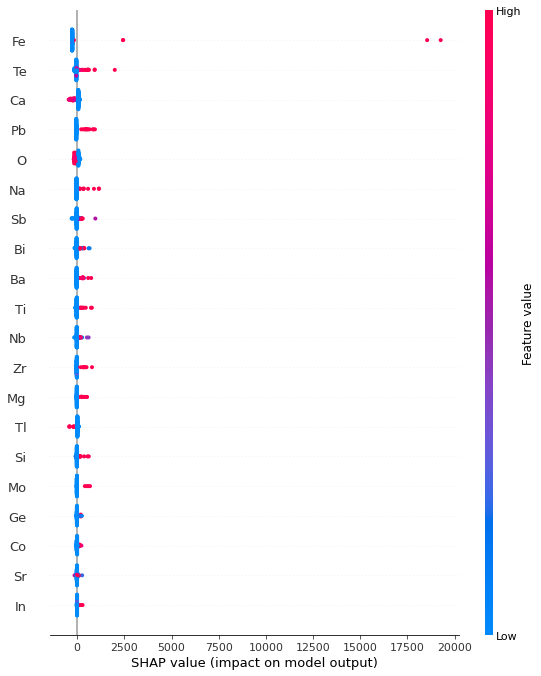

In [ ]:
shap.summary_plot(shap_values_s, X_train_s)

**Training 2: Elemental impact on thermal conductivity (𝜅)**

In [ ]:
X_k = ds_RT.iloc[:, 1: 50]

In [ ]:
print(X_k)

       B         O   Na        Mg   Al        Si    P    S    K        Ca  \
0    0.0  0.600000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.196000   
1    0.0  0.600000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.192000   
2    0.0  0.600000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.200000   
3    0.0  0.600000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.200000   
4    0.0  0.600000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.200000   
..   ...       ...  ...       ...  ...       ...  ...  ...  ...       ...   
199  0.0  0.000000  0.0  0.633333  0.0  0.333333  0.0  0.0  0.0  0.033333   
200  0.0  0.000000  0.0  0.666667  0.0  0.333333  0.0  0.0  0.0  0.000000   
201  0.0  0.000000  0.0  0.000000  0.0  0.666667  0.0  0.0  0.0  0.000000   
202  0.0  0.019737  0.0  0.000000  0.0  0.644745  0.0  0.0  0.0  0.000000   
203  0.0  0.055556  0.0  0.000000  0.0  0.604946  0.0  0.0  0.0  0.000000   

     ...   Tb   Dy   Ho   Yb   Hf    W   Au   Tl   Pb     Bi  
0    ...  0.

In [ ]:
y_kappa = ds_RT.iloc[:, -1]

In [ ]:
print(y_kappa)

0      2.513
1      2.268
2      2.500
3      1.787
4      2.850
       ...  
199    5.200
200    7.250
201    5.690
202    4.590
203    2.860
Name: kappa, Length: 204, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_kappa, test_size = 0.2, random_state = 0)

**Fitting Random Forest Model**

In [ ]:
rf_k=regr_rf.fit(X_train_k, y_train_k)

**SHAP analysis**

In [ ]:
explainer = shap.TreeExplainer(rf_k)
shap_values_k = explainer.shap_values(X_train_k)
print(shap_values_k)

[[-0.00130494 -0.16005162 -0.07075638 ...  0.02098021 -0.0180876
   0.00668726]
 [-0.00233288  0.2754721  -0.10408307 ...  0.05151288  0.50233528
   0.00600009]
 [-0.00194981  0.40400509 -0.08001308 ...  0.03549677 -0.02969064
   0.00656542]
 ...
 [-0.00130494 -0.15758501 -0.07034373 ...  0.02153471 -0.01732756
   0.00669843]
 [-0.00294755  0.3656648  -0.08082863 ...  0.04141005 -0.03801853
   0.0163353 ]
 [-0.00204417 -0.12228554 -0.0769754  ...  0.1490708  -0.03486947
   0.00892612]]


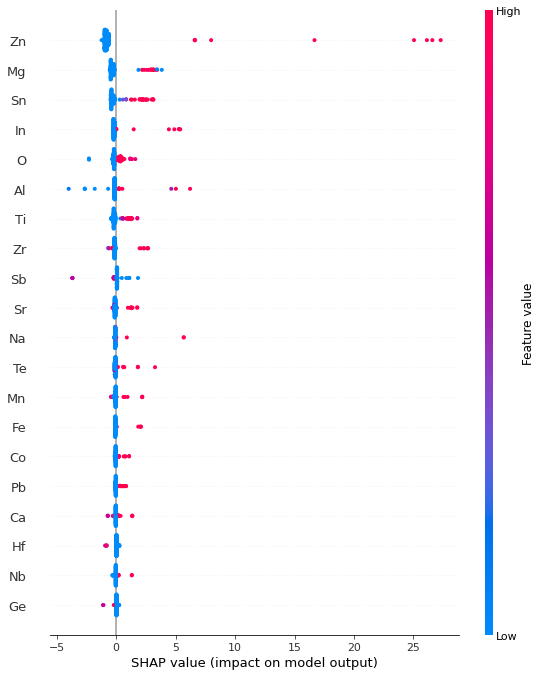

In [ ]:
shap.summary_plot(shap_values_k, X_train_k)